In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from src.utils import fetch_data_from_db
from src.utils import fetch_data_from_db_table

In [3]:
query = "SELECT * FROM xdr_data"
df = fetch_data_from_db(query)

In [4]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
clean = fetch_data_from_db_table('clean_data')
clean = df

# Task 3.1
### Aggregate the number of xDR sessions, session duration and the total download (DL) and upload (UL) data for each application

In [24]:
# Aggregate the engagement metrics per customer id (MSISDN)
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
engagement_metrics = df.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'Dur. (ms)': 'sum', 'Total Traffic (Bytes)': 'sum'})
engagement_metrics.columns = ['Session Frequency', 'Session Duration', 'Total Traffic']


In [25]:
# Aggregate user total traffic per application
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
for app in applications:
    df[f'{app} Total Traffic (Bytes)'] = df[f'{app} DL (Bytes)'] + df[f'{app} UL (Bytes)']
app_traffic = df.groupby('MSISDN/Number')[[f'{app} Total Traffic (Bytes)' for app in applications]].sum()

# Print the aggregate and total download and upload for each application
print(app_traffic)

               Social Media Total Traffic (Bytes)  \
MSISDN/Number                                       
3.360100e+10                                27.13   
3.360100e+10                                63.04   
3.360100e+10                                49.50   
3.360101e+10                               273.73   
3.360101e+10                                52.84   
...                                           ...   
3.379000e+10                               293.15   
3.379000e+10                               486.88   
3.197021e+12                               698.47   
3.370000e+14                               509.34   
8.823971e+14                                46.30   

               Youtube Total Traffic (Bytes)  Netflix Total Traffic (Bytes)  \
MSISDN/Number                                                                 
3.360100e+10                           20.62                          25.92   
3.360100e+10                           11.86                         762.

In [26]:
def convert_bytes(size_in_bytes):
    """
    This function takes in a size in bytes and converts it to a more readable format.
    """
    # Define conversion constants
    KB = 1024
    MB = KB * 1024
    GB = MB * 1024
    TB = GB * 1024

    # Convert based on size
    if size_in_bytes < KB:
        return f'{size_in_bytes} Bytes'
    elif size_in_bytes < MB:
        return f'{size_in_bytes/KB:.2f} KB'
    elif size_in_bytes < GB:
        return f'{size_in_bytes/MB:.2f} MB'
    elif size_in_bytes < TB:
        return f'{size_in_bytes/GB:.2f} GB'
    else:
        return f'{size_in_bytes/TB:.2f} TB'

# Apply the function to the DataFrame columns
for app in applications:
    df[f'{app} Total Traffic (Bytes)'] = df[f'{app} Total Traffic (Bytes)'].apply(convert_bytes)

In [27]:
# Apply the function to the DataFrame columns
for app in applications:
    df[f'{app} DL (Bytes)'] = df[f'{app} DL (Bytes)'].apply(convert_bytes)
    df[f'{app} UL (Bytes)'] = df[f'{app} UL (Bytes)'].apply(convert_bytes)

# Display the values of the download (DL) and upload (UL) for each application
for app in applications:
    print(f"{app} DL and UL values:")
    print(df[[f'{app} DL (Bytes)', f'{app} UL (Bytes)']])

Social Media DL and UL values:
       Social Media DL (Bytes) Social Media UL (Bytes)
0                   1.47 Bytes             23.85 Bytes
1                   1.84 Bytes               7.0 Bytes
2                   1.61 Bytes             41.23 Bytes
3                 629.02 Bytes             13.06 Bytes
4                 842.38 Bytes             49.01 Bytes
...                        ...                     ...
149996               3.3 Bytes             50.87 Bytes
149997              2.24 Bytes              7.43 Bytes
149998              1.19 Bytes             14.06 Bytes
149999            782.76 Bytes             21.06 Bytes
150000              1.71 Bytes             32.16 Bytes

[150001 rows x 2 columns]
Youtube DL and UL values:
       Youtube DL (Bytes) Youtube UL (Bytes)
0             15.12 Bytes         2.39 Bytes
1             19.31 Bytes        18.23 Bytes
2             18.81 Bytes        14.02 Bytes
3              20.4 Bytes        14.44 Bytes
4             14.55 Bytes      

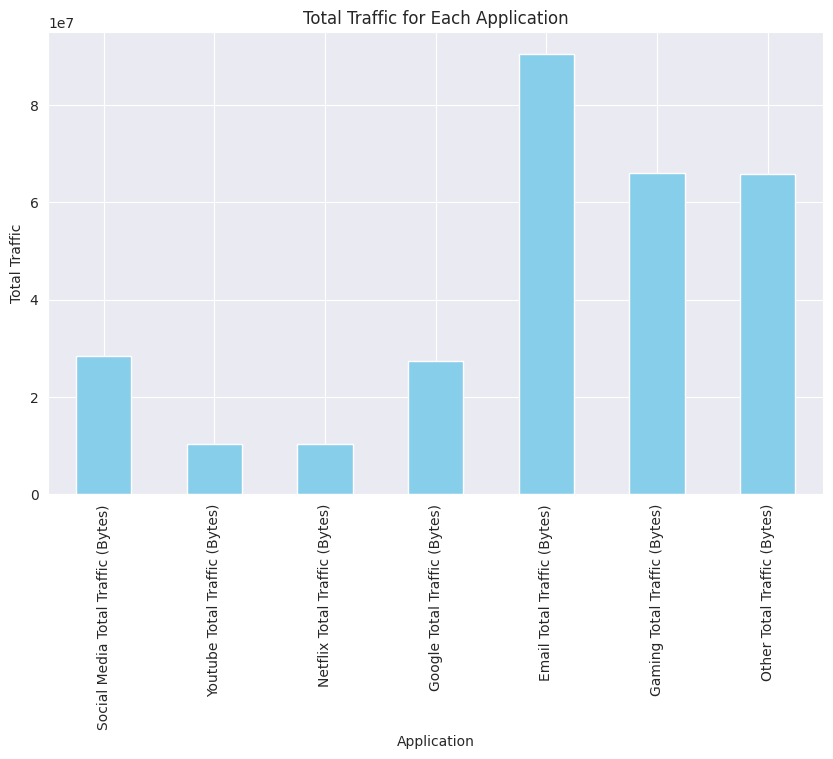

In [28]:
# Viualize the aggregate and total download and upload for each application
import matplotlib.pyplot as plt

# Plot the total traffic for each application
app_traffic.sum().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Traffic for Each Application')
plt.xlabel('Application')
plt.ylabel('Total Traffic')
plt.show()


#### Top 10 customers per engagement metric

In [29]:

# Report the top 10 customers per engagement metric
top_10_customers = engagement_metrics.nlargest(10, ['Session Frequency', 'Session Duration', 'Total Traffic'])

# print the top 10 customers per engagement metric
top_10_customers

,Session Frequency,Session Duration,Total Traffic
MSISDN/Number,,,
3.362632e+10,18,8791927.0,7.971167e+09
3.362578e+10,17,18553754.0,8.499621e+09
3.361489e+10,17,9966898.0,8.846226e+09
3.365973e+10,16,4035428.0,7.705863e+09
3.376054e+10,15,9279434.0,8.514774e+09
3.367588e+10,15,4865947.0,7.891111e+09
3.366716e+10,13,8744914.0,5.618394e+09
3.360313e+10,12,6287761.0,4.976195e+09
3.376041e+10,12,5321667.0,7.132371e+09


In [17]:
# Convert the total traffic to a more readable format, session duration to hours and session frequency to days 
engagement_metrics['Total Traffic'] = engagement_metrics['Total Traffic'].apply(convert_bytes)
engagement_metrics['Session Duration'] = engagement_metrics['Session Duration'] / (1000 * 60 * 60)
engagement_metrics['Session Frequency'] = engagement_metrics['Session Frequency'] / 24

# Display the engagement metrics
engagement_metrics


,Session Frequency,Session Duration,Total Traffic
MSISDN/Number,,,
3.360100e+10,0.041667,0.032422,837.98 MB
3.360100e+10,0.041667,0.050342,149.59 MB
3.360100e+10,0.041667,0.037491,568.36 MB
3.360101e+10,0.041667,0.013855,402.76 MB
3.360101e+10,0.083333,0.010307,1.36 GB
...,...,...,...
3.379000e+10,0.041667,0.002447,681.54 MB
3.379000e+10,0.041667,0.039163,458.06 MB
3.197021e+12,0.041667,0.243718,221.37 MB


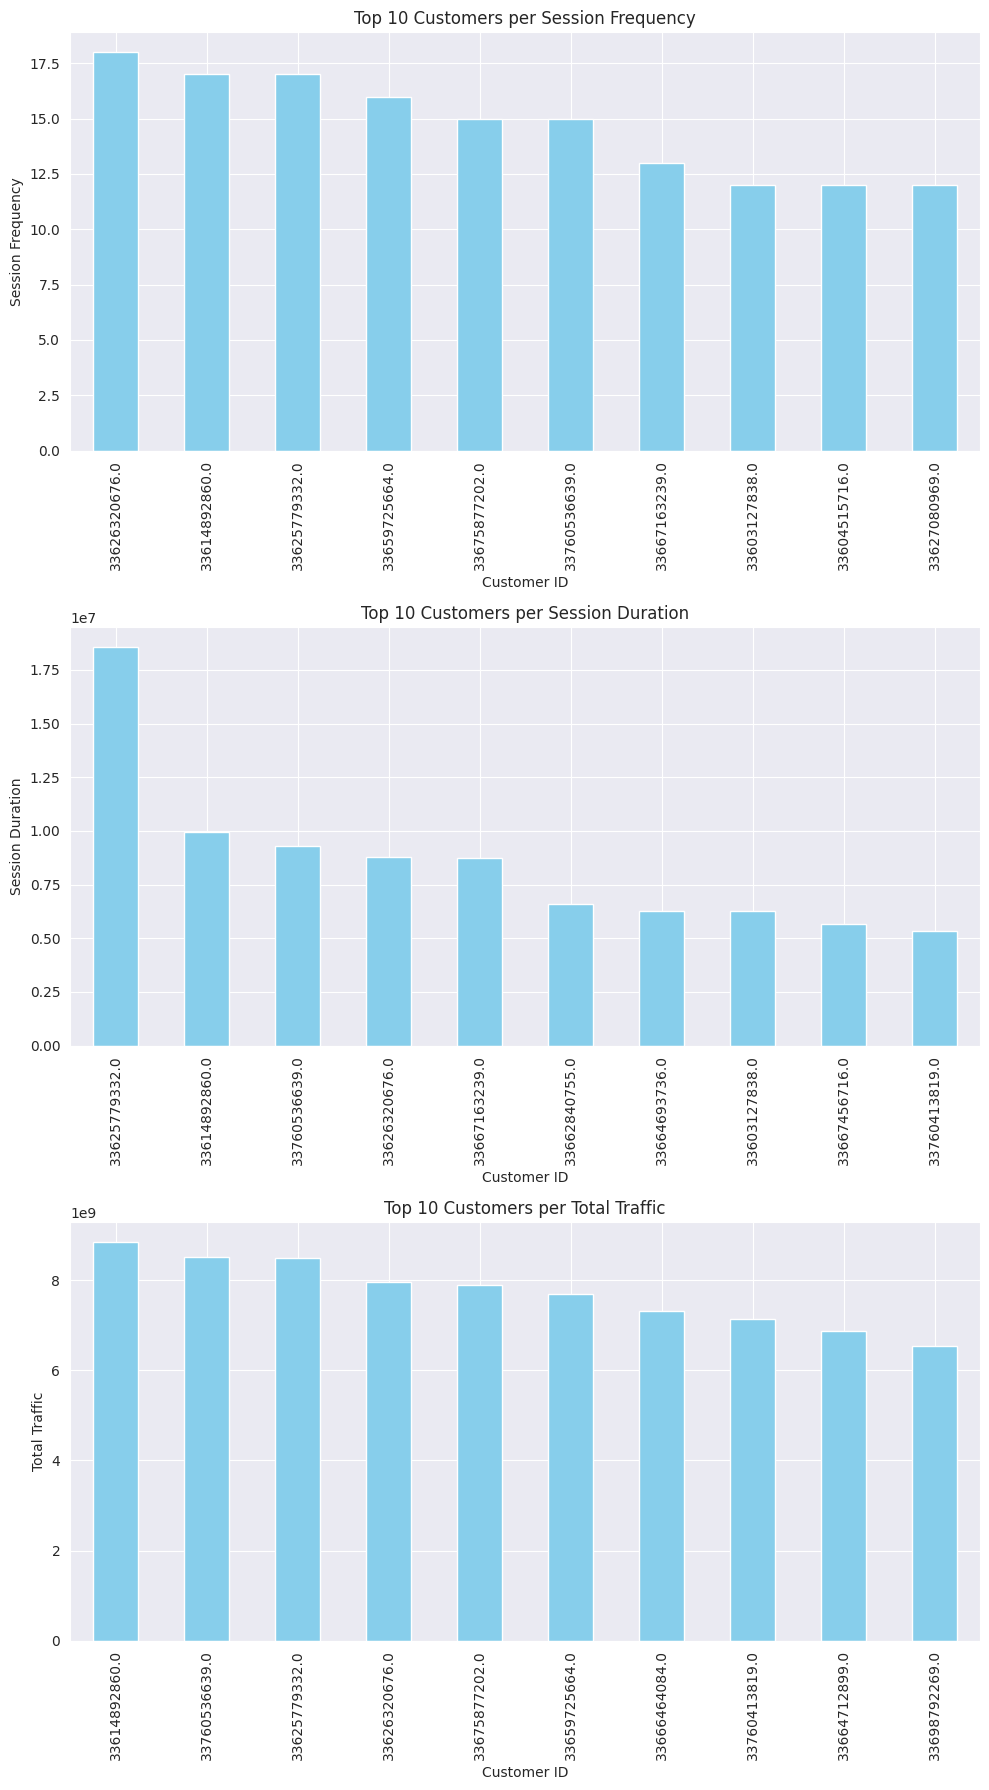

In [30]:
# Visualize the top 10 customers per engagement metric
import matplotlib.pyplot as plt

# Plot the top 10 customers per engagement metric
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

for i, metric in enumerate(engagement_metrics.columns):
    top_10_customers = engagement_metrics.nlargest(10, metric)
    top_10_customers[metric].plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Top 10 Customers per {metric}')
    axes[i].set_xlabel('Customer ID')
    axes[i].set_ylabel(metric)
    
plt.tight_layout()
plt.show()

### Normalize the engagement metrics and run a k-means (k=3) to classify customers in three groups of engagement

In [31]:

# Normalize each engagement metric
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics)

# Run a k-means (k=3) to classify customers in three groups of engagement
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_metrics)


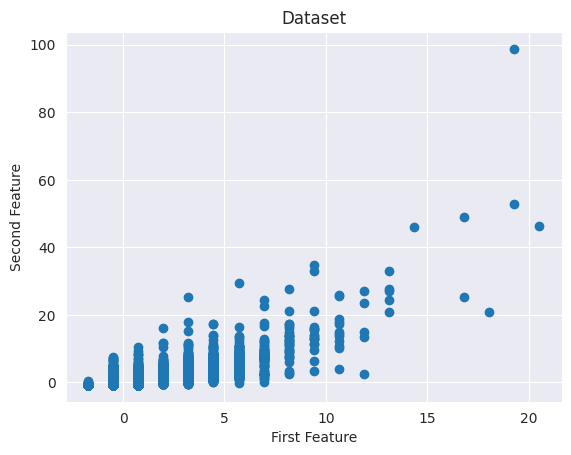

In [32]:
# Visualize the distribution of the normalized metric before using k-means
import matplotlib.pyplot as plt

# the k-mean = 3
x1 = normalized_metrics[:, 0]  # First feature
x2 = normalized_metrics[:, 1]  # Second feature

# Visualizing the data
plt.scatter(x1, x2)
plt.title('Dataset')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.show()

### Compute the minimum, maximum, average & total non-normalized metrics for each cluster

In [33]:

# Compute the minimum, maximum, average & total non-normalized metrics for each cluster
cluster_metrics = engagement_metrics.groupby(kmeans.labels_).agg(['min', 'max', 'mean', 'sum'])


### Aggregate user total traffic per application

In [34]:

# Aggregate user total traffic per application
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
for app in applications:
    df[f'{app} Total Traffic (Bytes)'] = df[f'{app} DL (Bytes)'] + df[f'{app} UL (Bytes)']
app_traffic = df.groupby('MSISDN/Number')[[f'{app} Total Traffic (Bytes)' for app in applications]].sum()


#### Top 10 users per application

In [43]:
# Convert the data back to numerical format for plotting
for app in applications:
    df[f'{app} Total Traffic (Bytes)'] = df[f'{app} Total Traffic (Bytes)'].str.extract(r'(\d+\.\d+)').astype(float)

# Recalculate app_traffic
app_traffic = df.groupby('MSISDN/Number')[[f'{app} Total Traffic (Bytes)' for app in applications]].sum()

# Derive the top 10 most engaged users per application
top_10_users_per_app = app_traffic.apply(lambda x: x.nlargest(10).index.tolist())

In [44]:
# Print the top 10 users per application
top_10_users_per_app

,Social Media Total Traffic (Bytes),Youtube Total Traffic (Bytes),Netflix Total Traffic (Bytes),Google Total Traffic (Bytes),Email Total Traffic (Bytes),Gaming Total Traffic (Bytes),Other Total Traffic (Bytes)
0,3.369879e+10,3.366333e+10,3.366022e+10,3.366170e+10,3.369900e+10,3.361489e+10,3.362632e+10
1,3.376127e+10,3.365895e+10,3.365807e+10,3.376352e+10,3.360452e+10,3.376054e+10,3.361489e+10
2,3.376205e+10,3.366610e+10,3.365814e+10,3.366268e+10,3.366592e+10,3.362578e+10,3.367588e+10
3,3.365973e+10,3.366638e+10,3.363779e+10,3.366357e+10,3.361489e+10,3.367588e+10,3.360313e+10
4,3.376041e+10,3.366751e+10,3.378374e+10,3.366617e+10,3.369880e+10,3.362632e+10,3.362578e+10
5,3.362788e+10,3.361370e+10,3.366646e+10,3.365153e+10,3.366789e+10,3.365973e+10,3.365973e+10
6,3.361489e+10,3.366159e+10,3.365260e+10,3.368390e+10,3.366114e+10,3.366646e+10,3.376054e+10
7,3.360852e+10,3.376449e+10,3.362385e+10,3.366663e+10,3.366897e+10,3.376041e+10,3.362695e+10
8,3.376166e+10,3.361764e+10,3.366204e+10,3.367645e+10,3.376041e+10,3.366471e+10,3.362708e+10
9,3.362632e+10,3.369970e+10,3.362330e+10,3.369856e+10,3.367812e+10,3.369879e+10,3.376127e+10


### Plot the top 3 most used applications

In [48]:
# Ensure that the DataFrame app_traffic is correctly computed
app_traffic = df.groupby('MSISDN/Number')[[f'{app} Total Traffic (Bytes)' for app in applications]].sum()

# Get the top 3 most used applications
top_3_apps = app_traffic.sum().nlargest(3).index

# Print the values in readable format of the top 3 most used applications
for app in top_3_apps:
    print(f"{app} Total Traffic:")
    print(df[f'{app} Total Traffic (Bytes)'].apply(convert_bytes))

Gaming Total Traffic (Bytes) Total Traffic:


KeyError: 'Gaming Total Traffic (Bytes) Total Traffic (Bytes)'

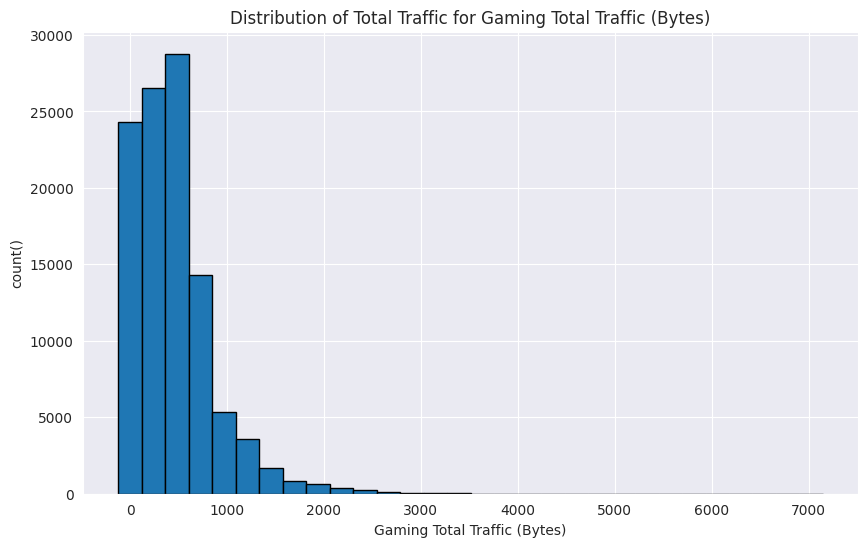

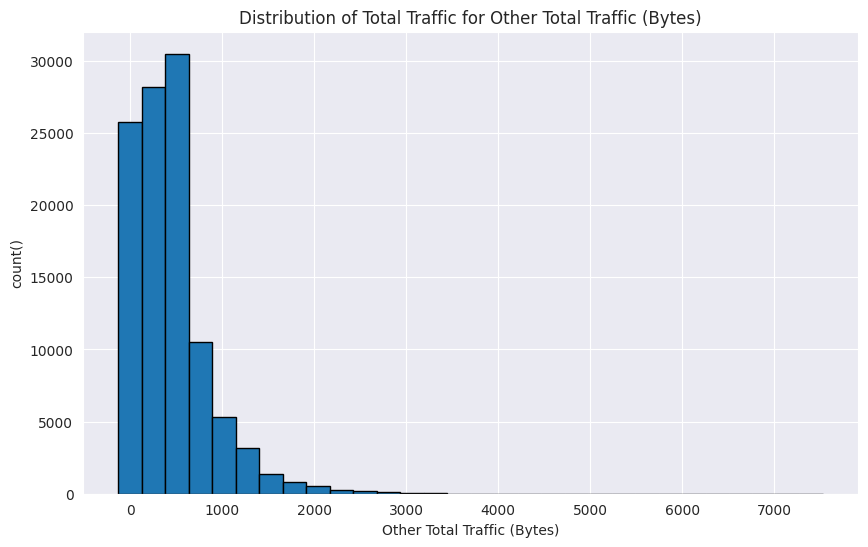

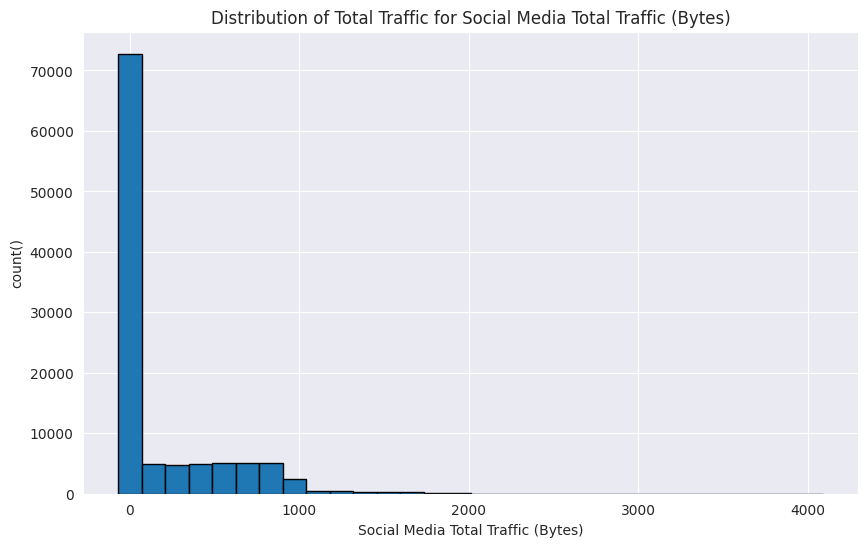

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the top 3 most used applications
top_3_apps = app_traffic.sum().nlargest(3).index

for app in top_3_apps:
    # Prepare the data
    data = app_traffic[app]
    counts, bins = np.histogram(data, bins=30)
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(bins[:-1], counts, width=(bins[1]-bins[0]), edgecolor='black')
    
    # Set the title and labels
    plt.title(f'Distribution of Total Traffic for {app}')
    plt.xlabel(app)
    plt.ylabel('count()')
    
    # Display the chart
    plt.show()

### Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
1. What is the optimized value of k (use elbow method for this)?  


In [12]:
# Run a k-means (k=3) to classify customers in three groups of engagement
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_metrics)

#### Visualize the distribution of the normalized metric before using k-means

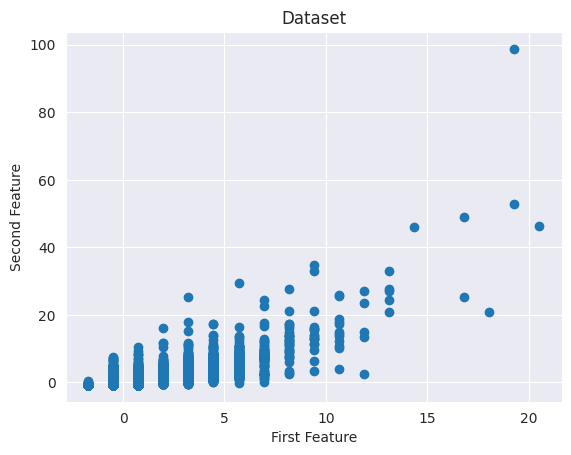

In [15]:
import matplotlib.pyplot as plt

# Assuming normalized_metrics is your data and it has two features
x1 = normalized_metrics[:, 0]  # First feature
x2 = normalized_metrics[:, 1]  # Second feature

# Visualizing the data
plt.scatter(x1, x2)
plt.title('Dataset')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.show()

#### The elbow method
- WCSS - It is defined as the sum of square distances between the centroids and
each points.
- Now For determining the best number of clusters(k) we plot a graph of k versus their WCSS value. 
- Surprisingly the graph looks like an elbow. (See from the graph)
- Also, When k=1 the WCSS has the highest value but with increasing k value WCSS value starts to decrease.
- We choose that value of k from where the graph starts to look like a straight line.

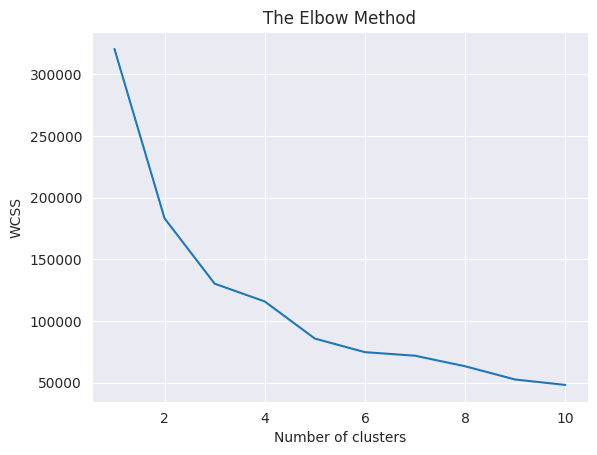

In [14]:

# Find the optimized value of k using the elbow method
# WCSS - defined as the sum of square distances between the centroids and each points.
wcss = []
for i in range(1, 11):
    # “init” argument is the method for initializing the centroid
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(normalized_metrics)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

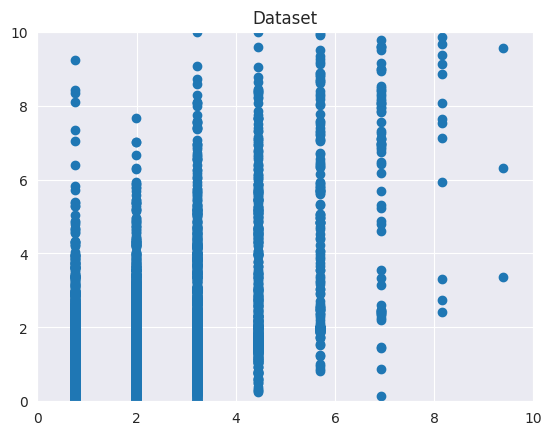

1 : 0.9056526308115298
2 : 0.6596101820187982
3 : 0.4326920729384103
4 : 0.4097766116295033
5 : 0.40563048387927425
6 : 0.3795442992501451
7 : 0.2996221259926552
8 : 0.292885019698292
9 : 0.25493644439322977


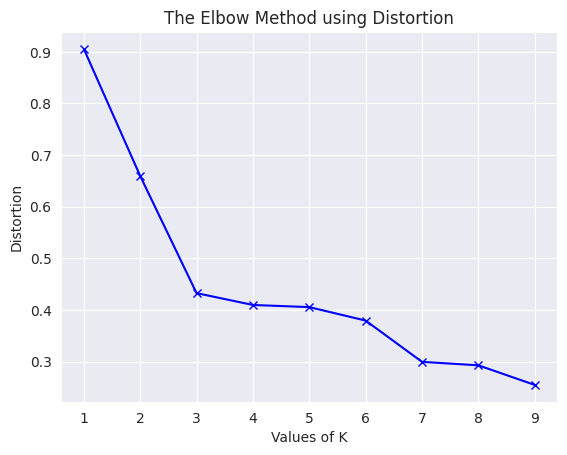

1 : 213712.00000000268
2 : 121316.657346257
3 : 86507.39671050623
4 : 58893.816976345784
5 : 51505.92920429193
6 : 39953.65300457585
7 : 33774.09098236582
8 : 28455.37217357904
9 : 24591.753719954868


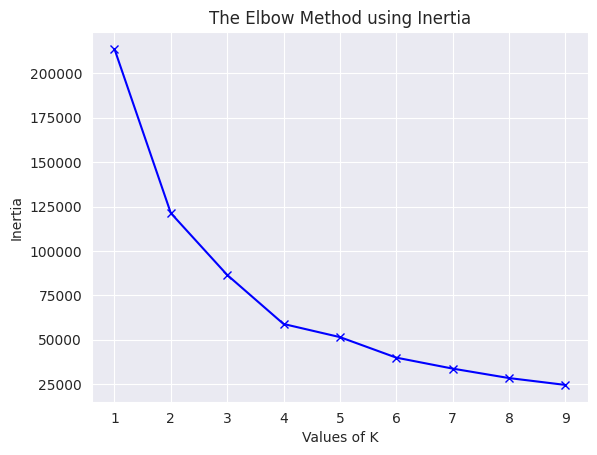

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Assuming normalized_metrics is your data and it has two features
x1 = normalized_metrics[:, 0]  # First feature
x2 = normalized_metrics[:, 1]  # Second feature
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# Visualizing the data
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# Building the clustering model and calculating the values of the Distortion and Inertia
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

# Using the different values of Distortion
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

# Using the different values of Inertia
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Execution time: 3.647804260253906e-05 seconds
Memory size: 56 bytes
